<img src='../images/ga_logo_large.png' style="display: block; margin-left: auto; margin-right: auto;">

---
## **Project 4: Stocks and Portfolios**

---
### **EDA and Visualizations: User Data**

In [6]:
# modules needed for this notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# read in clean file
file_path = '../data/clean_data/users_clean-data.csv'

users = pd.read_csv(file_path)

# check dimensions and first few rows
print(users.shape)
users.head()

(5000, 8)


,Age,Gender,City,Account Type,Account Balance,Account Balance After Transaction,Credit Limit,Credit Card Balance
0,45,Male,Fort Worth,Current,1313.38,2770.99,1737.88,4524.32
1,47,Female,Louisville,Current,5988.46,7649.45,1799.36,856.70
2,25,Female,Philadelphia,Current,8277.88,7437.97,6112.96,3242.36
3,52,Other,Oklahoma City,Savings,7487.21,12396.10,2069.41,4329.17
4,68,Other,Phoenix,Savings,6993.55,6404.48,2765.30,25.72


In [10]:
# make cols names snake_case
users.rename(columns = {
    'Age': 'age',
    'Gender': 'gender',
    'City': 'city',
    'Account Type': 'acc_type',
    'Account Balance': 'acc_bal',
    'Account Balance After Transaction': 'acc_bal_aft',
    'Credit Limit': 'credit_limit',
    'Credit Card Balance': 'credit_bal'
}, inplace = True)

# confirm
users.columns

Index(['age', 'gender', 'city', 'acc_type', 'acc_bal', 'acc_bal_aft',
       'credit_limit', 'credit_bal'],
      dtype='object')

All column names are now `snake_case`.

In [15]:
# check missing values and data types
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           5000 non-null   int64  
 1   gender        5000 non-null   object 
 2   city          5000 non-null   object 
 3   acc_type      5000 non-null   object 
 4   acc_bal       5000 non-null   float64
 5   acc_bal_aft   5000 non-null   float64
 6   credit_limit  5000 non-null   float64
 7   credit_bal    5000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 312.6+ KB


No missing data.  All data types look good.

---
### **Functions**
Non-native functions applicable to this notebook are listed in this section.

**Plot histogram and boxplot for a column**

In [20]:
def plot_hist_box(df, col_name, title = None, xlabel = None):
    '''
    This function plots a histogram and a boxplot of a column.
    
    Parameters:
    col_name: string, this is the column's name
    title: string, the plot title.  Default value is a blank string.
    xlabel: string, the x-axis label.  Default value is a blank string.
    
    Return:
    It returns two plots.  A histogram on the left and a boxplot on the right.
    '''

    plt.figure(figsize = (16, 6))

    plot1 = plt.subplot(1, 2, 1)  # for histogram
    plot2 = plt.subplot(1, 2, 2)  # for box plot

    # histogram ---------------------------------------------------------------------------------------------
    plot1.hist(df[col_name], bins = 25, color = '#00bcd4', edgecolor = '#ffffff');
    plot1.set_title(title, fontweight = 'bold', color = '#6e6e6e', fontsize = 14)
    plot1.set_xlabel(xlabel, color = '#6e6e6e', fontsize = 14)
    plot1.spines['top'].set_visible(False)
    plot1.spines['right'].set_visible(False)
    plot1.tick_params(axis = 'both', which = 'both', colors = '#6e6e6e', labelsize = 12);
    
    
    # box plot -----------------------------------------------------------------------------------------------
    sns.boxplot(data = df[col_name], ax = plot2, orient = 'h', color = '#00bcd4', medianprops = {'color':'#FFFFFF'});
    plot2.set_title(title, fontweight = 'bold', color = '#6e6e6e', fontsize = 14);
    plot2.spines['top'].set_visible(False)
    plot2.spines['left'].set_visible(False)
    plot2.spines['right'].set_visible(False)
    plot2.set_xlabel(xlabel, color = '#6e6e6e', fontsize = 14)
    plot2.tick_params(axis = 'x', which = 'both', colors = '#6e6e6e', labelsize = 12);

**Plot heatmap for given number of columns**

In [107]:
def plot_heatmap(df, columns):
    '''
    This function plots a heatmap of the number of columns passed in.
    
    Parameters:
    columns: list, a list of columns to plot.
    
    Return:
    It returns a heatmap of the columns.
    '''

    plt.figure(figsize = (6, 6))

    # heatmap setup
    corrs = round(df[columns].corr(), 2)
    mask = np.zeros_like(corrs)
    mask[np.triu_indices_from(mask)] = True

    # plot heatmap
    sns.heatmap(corrs,
                square = True,
                annot = True,
                cmap = 'Blues',
                mask = mask,
                vmin = -1,
                vmax = 1);

---
### **Correlations**

Start with a pairplot to see what's going on at a high level.

<Figure size 1200x1200 with 0 Axes>

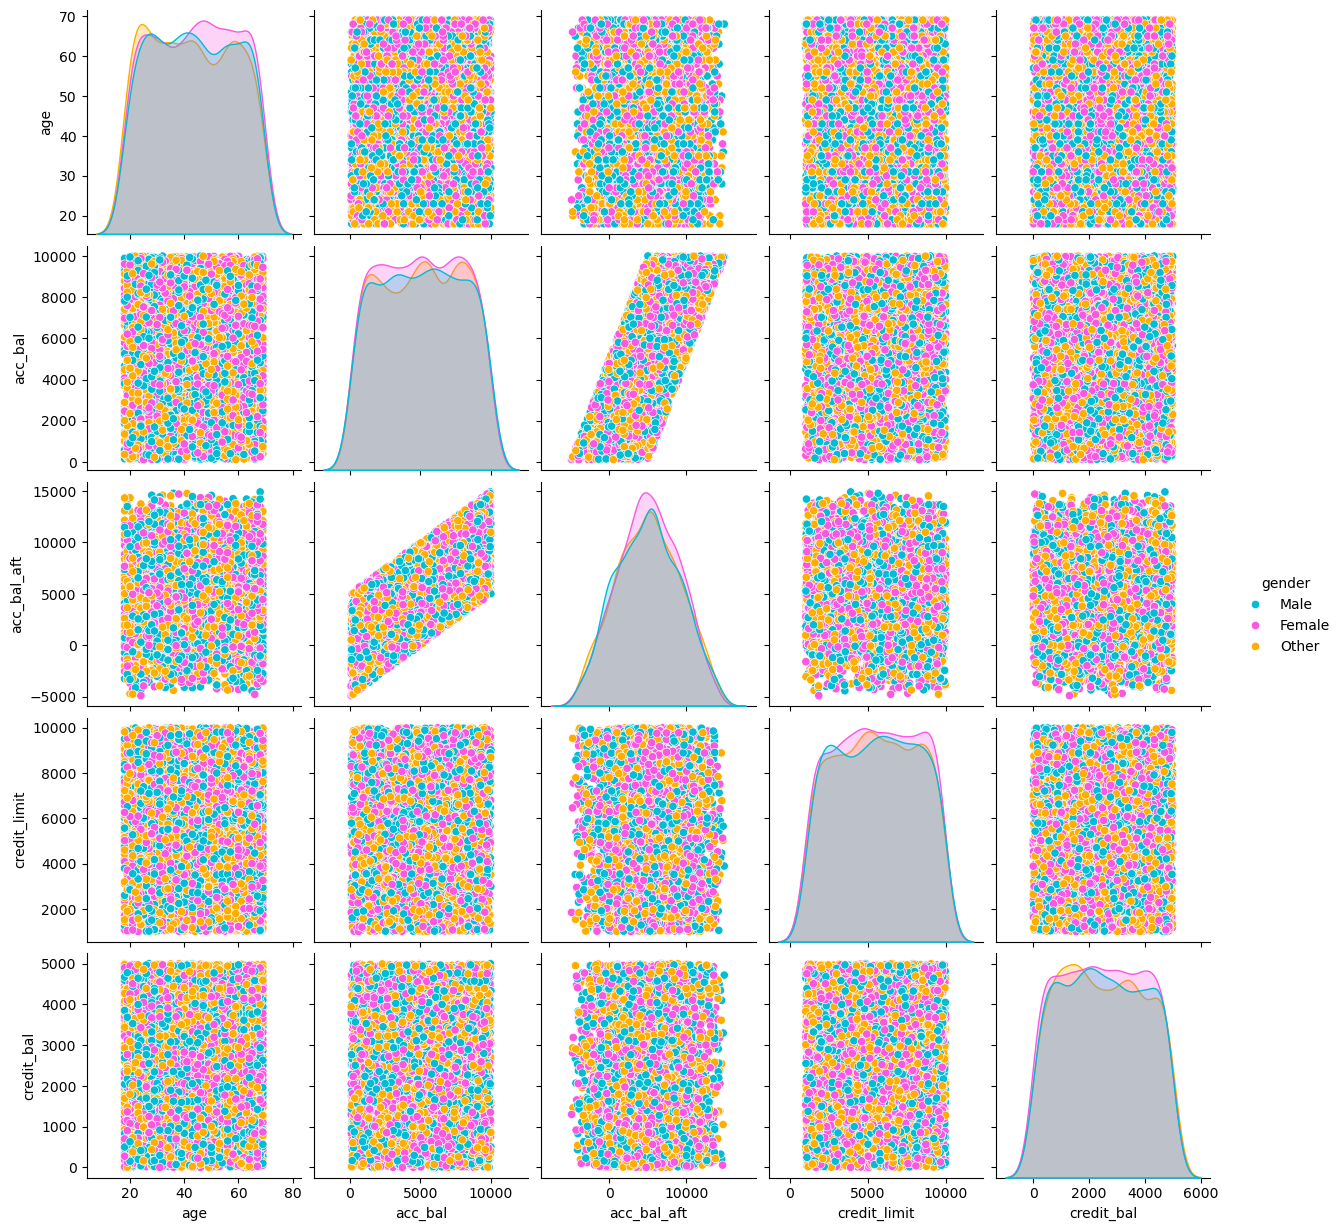

In [198]:
plt.figure(figsize = (12, 12));

sns.pairplot(users,
             hue = 'gender',
             palette = {             
                        'Female': '#fa57e2',
                        'Male': '#00bcd4',
                        'Other': '#ffae00'
                       }
            );
plt.savefig('../images/users_pairplot.png');

The only apparent correlation is between `acc_bal` and `acc_bal_aft`, and that one makes sense as account balances do change after each transaction.<br>
Next, take a look at just the numeric variables in a heatmap.

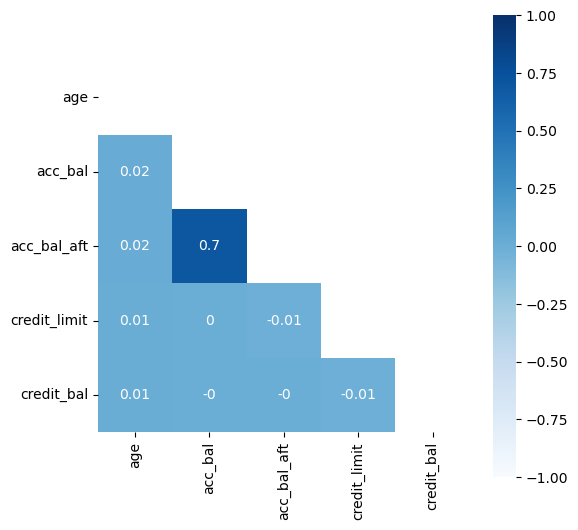

In [133]:
numeric_cols = ['age', 'acc_bal', 'acc_bal_aft', 'credit_limit', 'credit_bal']
plot_heatmap(users, numeric_cols)
plt.savefig('../images/users_numeric_heatmap.png')

Again, the only apparent correlation is between `acc_bal` and `acc_bal_aft`.
Next, take a look at that specific correlation, but split by gender to see if something stands out.

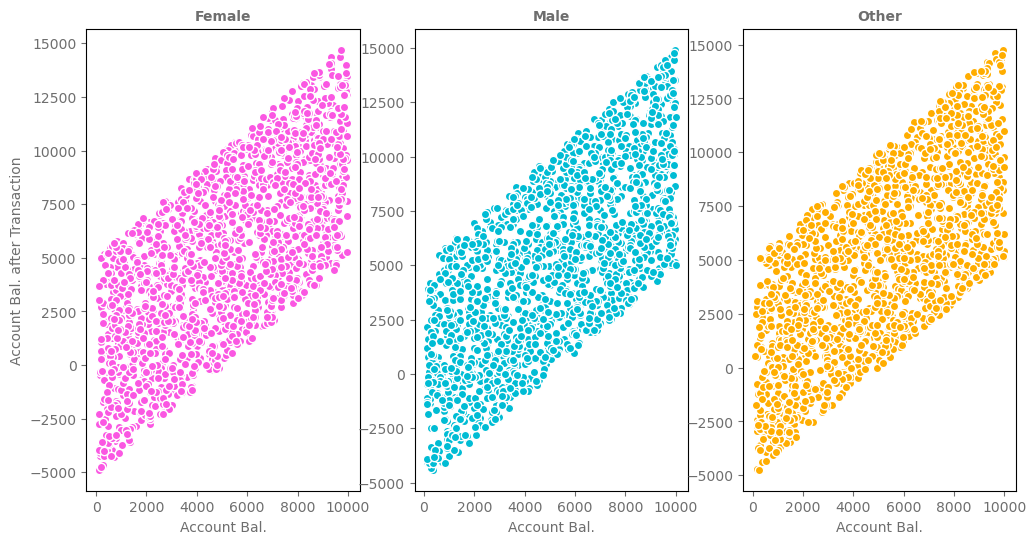

In [209]:
plt.figure(figsize = (12, 6))

plot_bal_f = plt.subplot(1, 3, 1)
plot_bal_m = plt.subplot(1, 3, 2)
plot_bal_o = plt.subplot(1, 3, 3)

plot_bal_f.scatter(users[users['gender'] == 'Female']['acc_bal'],
                   users[users['gender'] == 'Female']['acc_bal_aft'],
                   color = '#fa57e2',
                   edgecolors = '#ffffff')

plot_bal_m.scatter(users[users['gender'] == 'Male']['acc_bal'],
                   users[users['gender'] == 'Male']['acc_bal_aft'],
                   color = '#00bcd4',
                   edgecolors = '#ffffff')

plot_bal_o.scatter(users[users['gender'] == 'Other']['acc_bal'],
                   users[users['gender'] == 'Other']['acc_bal_aft'],
                   color = '#ffad00',
                   edgecolors = '#ffffff')

plot_bal_f.set_title('Female', fontweight = 'bold', color = '#6e6e6e', fontsize = 10)
plot_bal_m.set_title('Male', fontweight = 'bold', color = '#6e6e6e', fontsize = 10)
plot_bal_o.set_title('Other', fontweight = 'bold', color = '#6e6e6e', fontsize = 10)

plot_bal_f.set_xlabel('Account Bal.', color = '#6e6e6e', fontsize = 10)
plot_bal_m.set_xlabel('Account Bal.', color = '#6e6e6e', fontsize = 10)
plot_bal_o.set_xlabel('Account Bal.', color = '#6e6e6e', fontsize = 10)
plot_bal_f.set_ylabel('Account Bal. after Transaction', color = '#6e6e6e', fontsize = 10)

plot_bal_f.tick_params(axis = 'both', which = 'both', colors = '#6e6e6e', labelsize = 10)
plot_bal_m.tick_params(axis = 'both', which = 'both', colors = '#6e6e6e', labelsize = 10)
plot_bal_o.tick_params(axis = 'both', which = 'both', colors = '#6e6e6e', labelsize = 10);

plt.savefig('../images/scatterplot_balances_by_gender.png')

There is no clear distinction by gender either.  It's the same pattern for all three categories, where users with account balances under $2,000 seem to end up in the negative after their transactions are posted.<br>
Let's peel one more layer and pick three random age groups by gender.

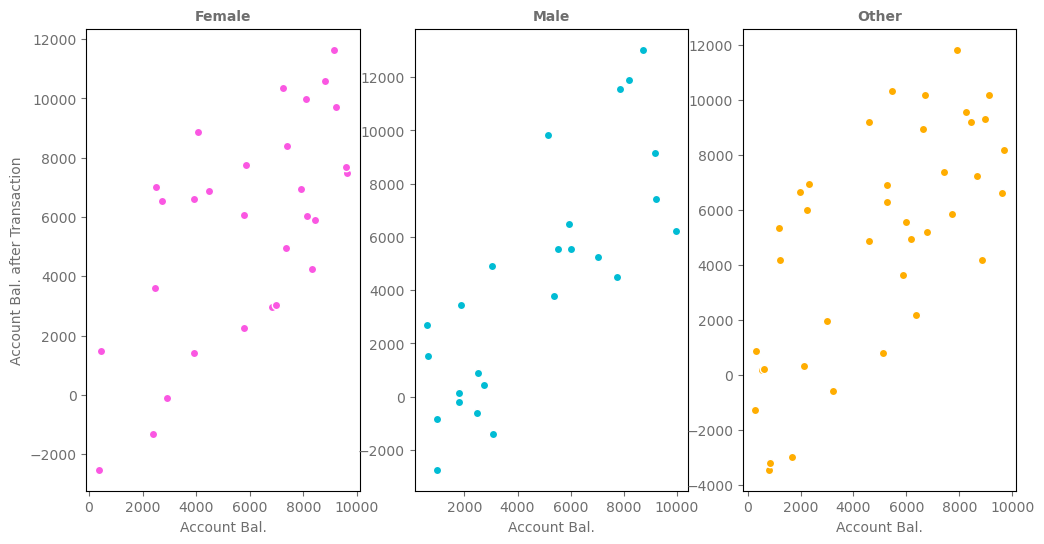

In [212]:
female_users = users[users['gender'] == 'Female']
male_users = users[users['gender'] == 'Male']
other_users = users[users['gender'] == 'Other']

plt.figure(figsize = (12, 6))

plot_bal_f_18 = plt.subplot(1, 3, 1)
plot_bal_m_69 = plt.subplot(1, 3, 2)
plot_bal_o_44 = plt.subplot(1, 3, 3)

plot_bal_f_18.scatter(female_users[female_users['age'] == 18]['acc_bal'],
                   female_users[female_users['age'] == 18]['acc_bal_aft'],
                   color = '#fa57e2',
                   edgecolors = '#ffffff')

plot_bal_m_69.scatter(male_users[male_users['age'] == 69]['acc_bal'],
                   male_users[male_users['age'] == 69]['acc_bal_aft'],
                   color = '#00bcd4',
                   edgecolors = '#ffffff')

plot_bal_o_44.scatter(other_users[other_users['age'] == 44]['acc_bal'],
                   other_users[other_users['age'] == 44]['acc_bal_aft'],
                   color = '#ffad00',
                   edgecolors = '#ffffff');

plot_bal_f_18.set_title('Female', fontweight = 'bold', color = '#6e6e6e', fontsize = 10)
plot_bal_m_69.set_title('Male', fontweight = 'bold', color = '#6e6e6e', fontsize = 10)
plot_bal_o_44.set_title('Other', fontweight = 'bold', color = '#6e6e6e', fontsize = 10)

plot_bal_f_18.set_xlabel('Account Bal.', color = '#6e6e6e', fontsize = 10)
plot_bal_m_69.set_xlabel('Account Bal.', color = '#6e6e6e', fontsize = 10)
plot_bal_o_44.set_xlabel('Account Bal.', color = '#6e6e6e', fontsize = 10)
plot_bal_f_18.set_ylabel('Account Bal. after Transaction', color = '#6e6e6e', fontsize = 10)

plot_bal_f_18.tick_params(axis = 'both', which = 'both', colors = '#6e6e6e', labelsize = 10)
plot_bal_m_69.tick_params(axis = 'both', which = 'both', colors = '#6e6e6e', labelsize = 10)
plot_bal_o_44.tick_params(axis = 'both', which = 'both', colors = '#6e6e6e', labelsize = 10);

plt.savefig('../images/scatterplot_balances_by_age_and_gender.png')

The pattern repeats, the higher the balance the less likely to end up negative.  The threshold seems to be $2,000.  No further analysis is warranted at the moment for these correlations.

---
### **Individual Columns**

---
**Column**: `age`

In [230]:
# basic stats
users['age'].describe()

count    5000.000000
mean       43.469800
std        15.145672
min        18.000000
25%        30.000000
50%        43.000000
75%        57.000000
max        69.000000
Name: age, dtype: float64

In [232]:
print(f"Minimum age: {users['age'].min()}, Maximum age: {users['age'].max()}")

Minimum age: 18, Maximum age: 69


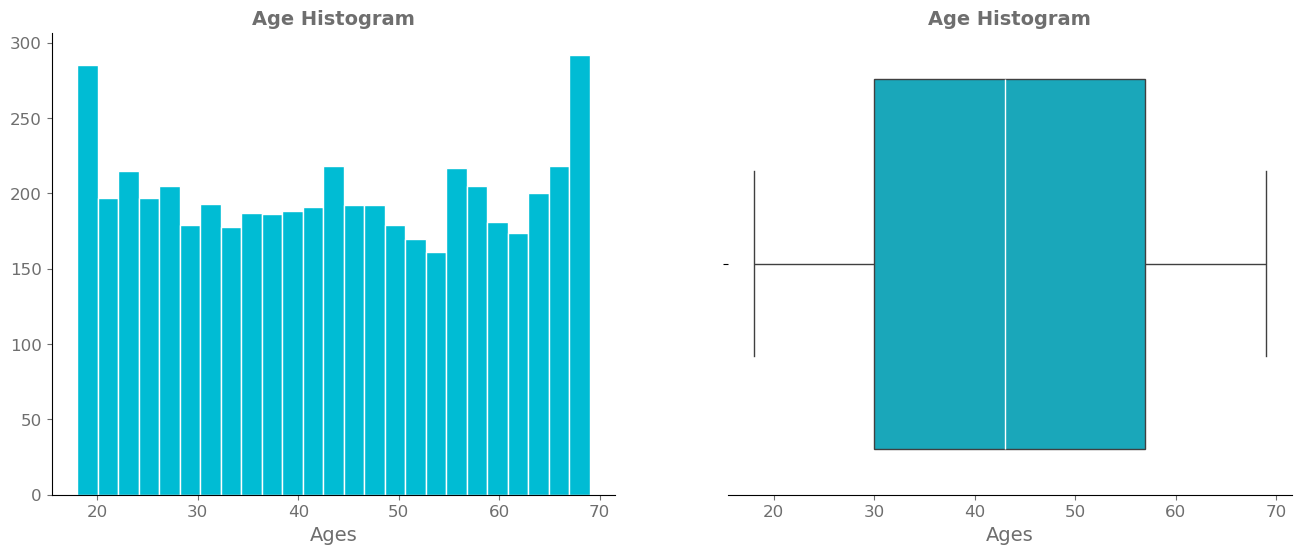

In [234]:
# check histogram for age
plot_hist_box(users, 'age', title = 'Age Histogram', xlabel = 'Ages')
plt.savefig('../images/hist_&_boxplot_age.png')

The age data looks almost uniform with no outliers.

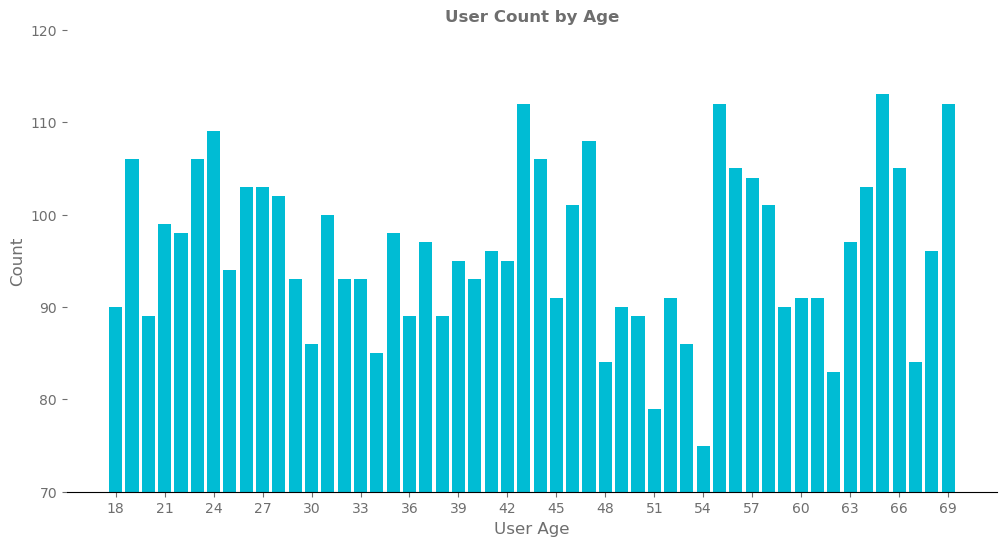

In [251]:
# user count by age
ages = users['age'].value_counts().sort_index().index        # x categories
age_count = users['age'].value_counts().sort_index().values  # y values

plt.figure(figsize = (12, 6))
plot_age = plt.subplot(1, 1, 1)

plot_age.bar(ages, age_count, color = '#00bcd4')

plot_age.spines['top'].set_visible(False)
plot_age.spines['left'].set_visible(False)
plot_age.spines['right'].set_visible(False)
plot_age.tick_params(axis = 'both', which = 'both', colors = '#6e6e6e', labelsize = 10)

plot_age.set_title('User Count by Age', fontweight = 'bold', color = '#6e6e6e', fontsize = 12)
plot_age.set_xlabel('User Age', color = '#6e6e6e', fontsize = 12)
plot_age.set_ylabel('Count', color = '#6e6e6e', fontsize = 12)

plt.xticks(ages[::3])
plt.ylim(70, 120);
plt.savefig('../images/bar_age_count.png')

Besides 54 being the age with the least users, there is nothing jumping out that warrants further exploration.

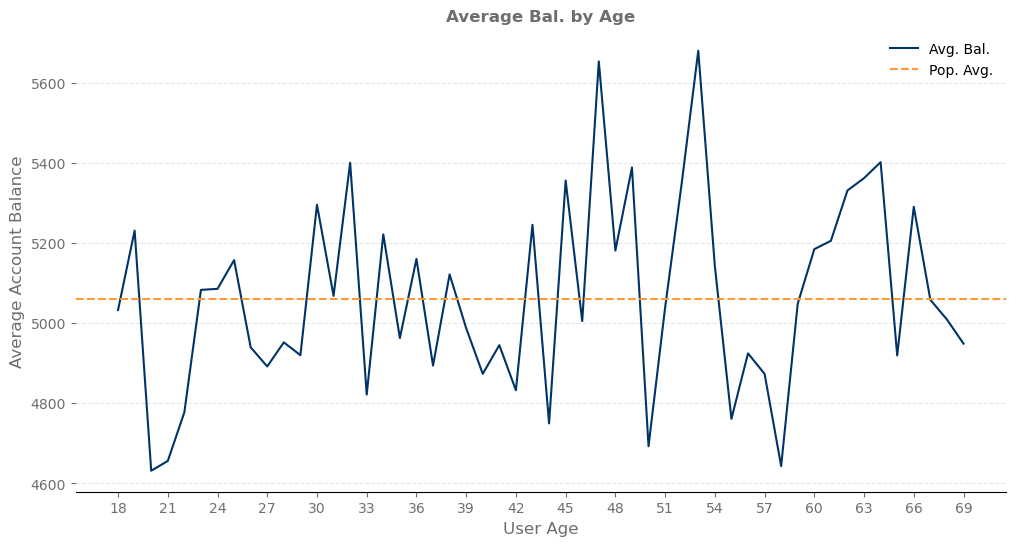

In [310]:
# average balance by age
bal_by_age = users.groupby('age')['acc_bal'].mean().values

plt.figure(figsize = (12, 6))
plot_bal_by_age = plt.subplot(1, 1, 1)

plot_bal_by_age.plot(ages, bal_by_age, color = '#003366', label = 'Avg. Bal.')
plot_bal_by_age.axhline(users['acc_bal'].mean(), color='#ff9933', linestyle='--', label = 'Pop. Avg.')
plot_bal_by_age.yaxis.grid(True, which='both', linestyle='--', alpha=0.3)

plot_bal_by_age.spines['top'].set_visible(False)
plot_bal_by_age.spines['left'].set_visible(False)
plot_bal_by_age.spines['right'].set_visible(False)
plot_bal_by_age.tick_params(axis = 'both', which = 'both', colors = '#6e6e6e', labelsize = 10)

plot_bal_by_age.set_title('Average Bal. by Age', fontweight = 'bold', color = '#6e6e6e', fontsize = 12)
plot_bal_by_age.set_xlabel('User Age', color = '#6e6e6e', fontsize = 12)
plot_bal_by_age.set_ylabel('Average Account Balance', color = '#6e6e6e', fontsize = 12)

plt.legend(frameon = False)
plt.xticks(ages[::3]);
plt.savefig('../images/line_avg_bal_by_age.png')

Some age groups are below the population average, while others are above. It would be interesting to break this down by gender and by city to see if anything stands out significantly.

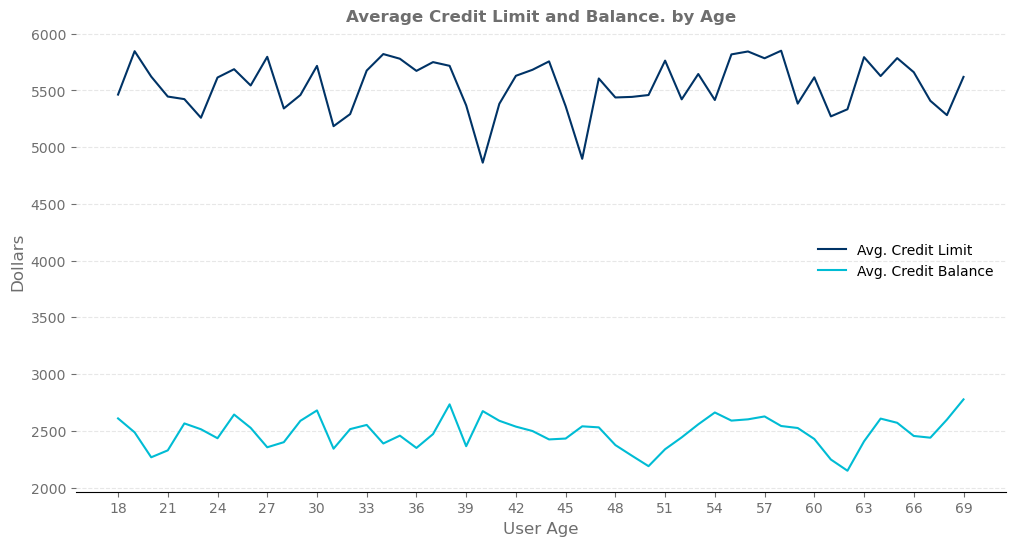

In [321]:
# average credit limit vs. credit card balance by age
credit_limit_by_age = users.groupby('age')['credit_limit'].mean().values
credit_card_bal_by_age = users.groupby('age')['credit_bal'].mean().values


plt.figure(figsize = (12, 6))
plot_cc_by_age = plt.subplot(1, 1, 1)

plot_cc_by_age.plot(ages, credit_limit_by_age, color = '#003366', label = 'Avg. Credit Limit')
plot_cc_by_age.plot(ages, credit_card_bal_by_age, color = '#00bcd4', label = 'Avg. Credit Balance')

plot_cc_by_age.yaxis.grid(True, which='both', linestyle='--', alpha=0.3)
plot_cc_by_age.spines['top'].set_visible(False)
plot_cc_by_age.spines['left'].set_visible(False)
plot_cc_by_age.spines['right'].set_visible(False)
plot_cc_by_age.tick_params(axis = 'both', which = 'both', colors = '#6e6e6e', labelsize = 10)

plot_cc_by_age.set_title('Average Credit Limit and Balance. by Age', fontweight = 'bold', color = '#6e6e6e', fontsize = 12)
plot_cc_by_age.set_xlabel('User Age', color = '#6e6e6e', fontsize = 12)
plot_cc_by_age.set_ylabel('Dollars', color = '#6e6e6e', fontsize = 12)

plt.legend(frameon = False)
plt.xticks(ages[::3]);
plt.savefig('../images/line_credit_avg_by_age.png')

Responsible users, no age group is maxed out.  It would be worth exploring by specific age cohort, city and gender to see if any interesting patterns emerge.

---
**Column**: `gender`

In [390]:
# user count by gender
users['gender'].value_counts().reset_index()

,gender,count
0,Female,1727
1,Other,1639
2,Male,1634


Most users are female, there is no large discrepancies between the genders.

In [339]:
# avg balance by gender
users.groupby(['gender', 'acc_type'])['acc_bal'].mean().reset_index()

,gender,acc_type,acc_bal
0,Female,Current,5034.511525
1,Female,Savings,5026.433721
2,Male,Current,4932.860718
3,Male,Savings,5191.183619
4,Other,Current,5038.733060
5,Other,Savings,5138.226909


In [341]:
# avg credit limit by gender
users.groupby('gender')['credit_limit'].mean().reset_index()

,gender,credit_limit
0,Female,5550.918292
1,Male,5562.944125
2,Other,5533.186431


In [345]:
# avg credit balance by gender
users.groupby('gender')['credit_bal'].mean().reset_index()

,gender,credit_bal
0,Female,2481.603804
1,Male,2494.398501
2,Other,2486.532813


Balances across genders don't show any huge deviation.

---
**Column**: `city`

In [272]:
# how many cities are represented?
print(f"There are {users['city'].nunique()} unique cities")

There are 40 unique cities


In [410]:
# what's the user count by city?
users.groupby('city')['city'].count().sort_values(ascending = False).to_frame()

,city
city,
San Jose,163
Indianapolis,152
San Francisco,148
Detroit,143
Tucson,138
Denver,138
Las Vegas,137
El Paso,133
Columbus,131


There are more than 100 users per city with a gap of 61 users between San Jose and Fresno.  There is also good geographic representation with cities from all regions.

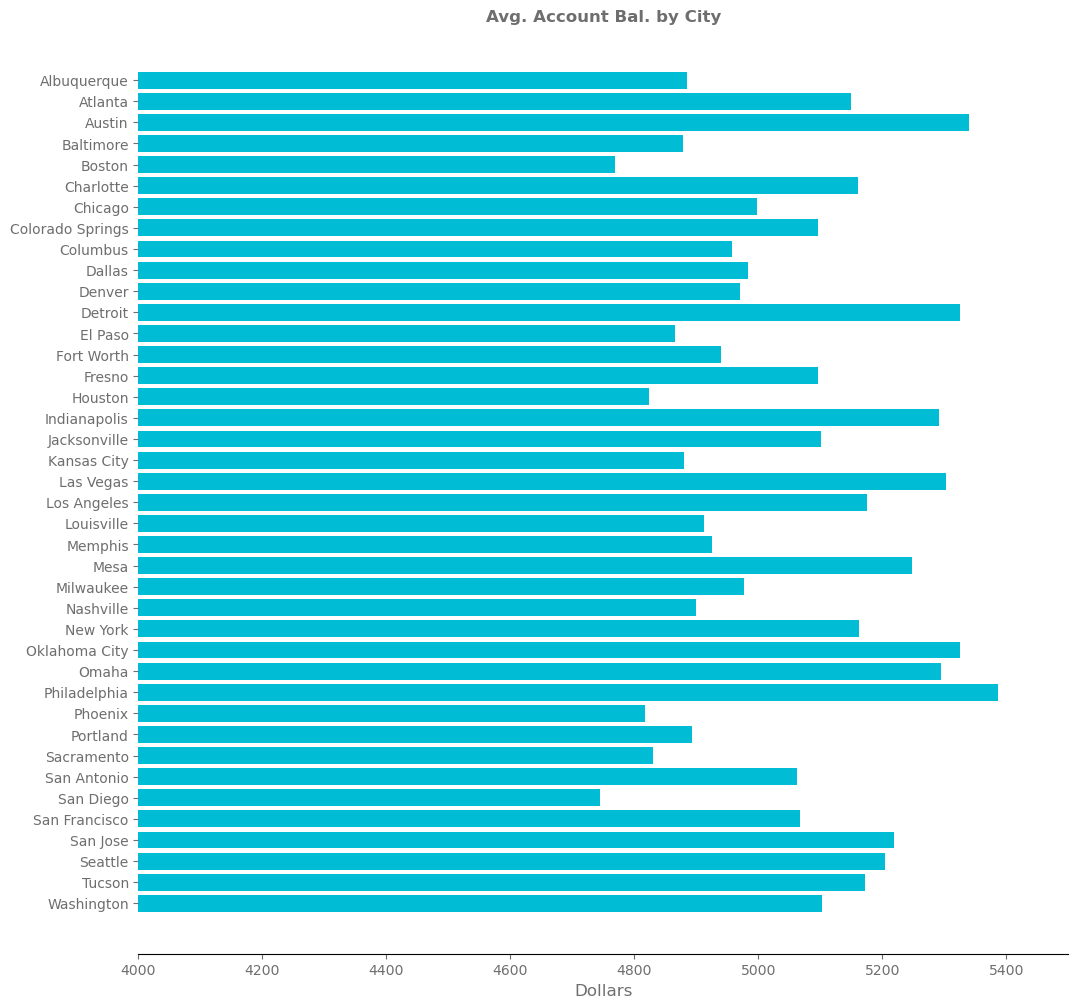

In [455]:
# what's the average account balance by city?
cities = users.groupby('city')['acc_bal'].mean().sort_index(ascending = False).index
avg_bal = users.groupby('city')['acc_bal'].mean().sort_index(ascending = False).values

plt.figure(figsize = (12, 12))
plot_city = plt.subplot(1, 1, 1)

plot_city.barh(cities, avg_bal, height = 0.8, color = '#00bcd4')

plot_city.spines['top'].set_visible(False)
plot_city.spines['left'].set_visible(False)
plot_city.spines['right'].set_visible(False)
plot_city.tick_params(axis = 'both', which = 'both', colors = '#6e6e6e', labelsize = 10)

plot_city.set_title('Avg. Account Bal. by City', fontweight = 'bold', color = '#6e6e6e', fontsize = 12)
plot_city.set_xlabel('Dollars', color = '#6e6e6e', fontsize = 12)

plt.xlim(4000, 5500);
plt.savefig('../images/bar_h_avg_by_city.png')

Average account balances across all 40 cities don't show much divergence.  They all exceed 4K USD but do not exceed 5.5K USD.

---
**Column**: `acc_type`

In [511]:
users['acc_type'].value_counts().reset_index()

,acc_type,count
0,Savings,2507
1,Current,2493


Pretty balanced.  Not much to see here.

---
**Column**: `acc_bal`

In [562]:
users['acc_bal'].describe().round().reset_index().T

,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
acc_bal,5000.0,5061.0,2849.0,107.0,2583.0,5076.0,7510.0,9998.0


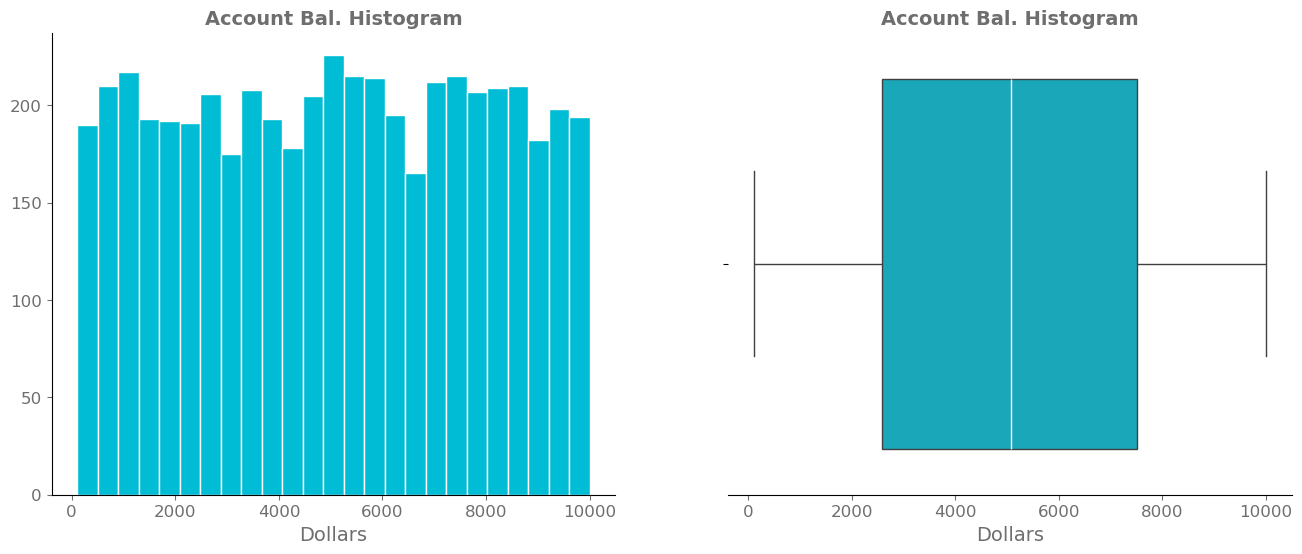

In [527]:
plot_hist_box(users, 'acc_bal', title = 'Account Bal. Histogram', xlabel = 'Dollars')
plt.savefig('../images/hist_&_boxplot_acc_bal.png')

The account balances are well uniformely distributed with no outliers.

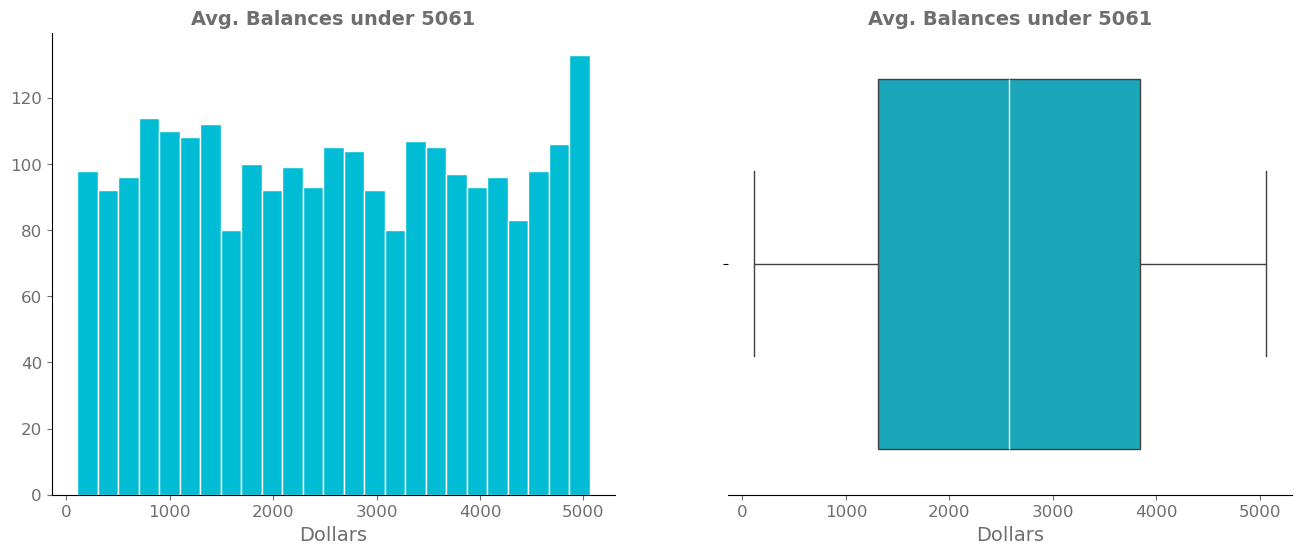

In [540]:
# what's the distribution for balances below the mean?
plot_hist_box(users[users['acc_bal'] < users['acc_bal'].mean()], 
              'acc_bal', 
              title = f"Avg. Balances under {round(users['acc_bal'].mean())}", 
              xlabel = 'Dollars')
#plt.savefig('../images/hist_&_boxplot_acc_bal.png')

Even for balances below the mean the distribution is quite uniform with no outliers.

**Column**: `acc_bal_aft`

In [566]:
users['acc_bal_aft'].describe().round().reset_index().T

,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
acc_bal_aft,5000.0,5037.0,4053.0,-4879.0,2047.0,5090.0,8036.0,14911.0


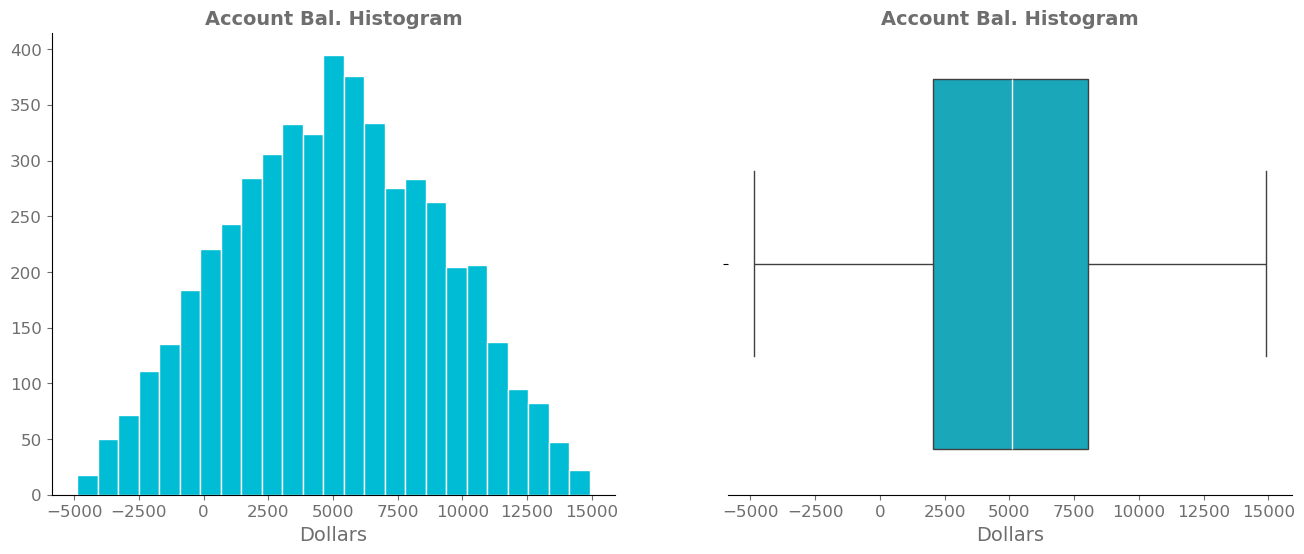

In [555]:
plot_hist_box(users, 'acc_bal_aft', title = 'Account Bal. Histogram', xlabel = 'Dollars')
#plt.savefig('../images/hist_&_boxplot_acc_bal.png')

Although for this column there are no outliers, the distribution is rather peculiar, more pyramidal than normally distributed.  Take a look at the balances that are negative.

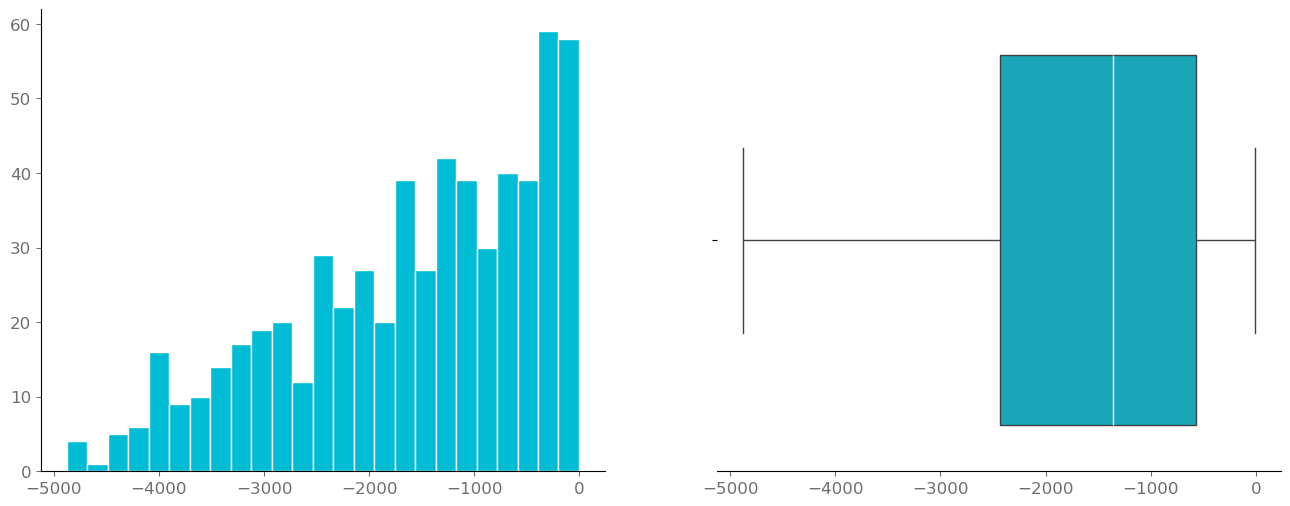

In [575]:
plot_hist_box(users[users['acc_bal_aft'] < 0], 'acc_bal_aft')

This distribution is quite odd.

---
**Column**: `credit_limit`

In [578]:
users['credit_limit'].describe().round().reset_index().T

,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
credit_limit,5000.0,5549.0,2582.0,1007.0,3314.0,5567.0,7786.0,9998.0


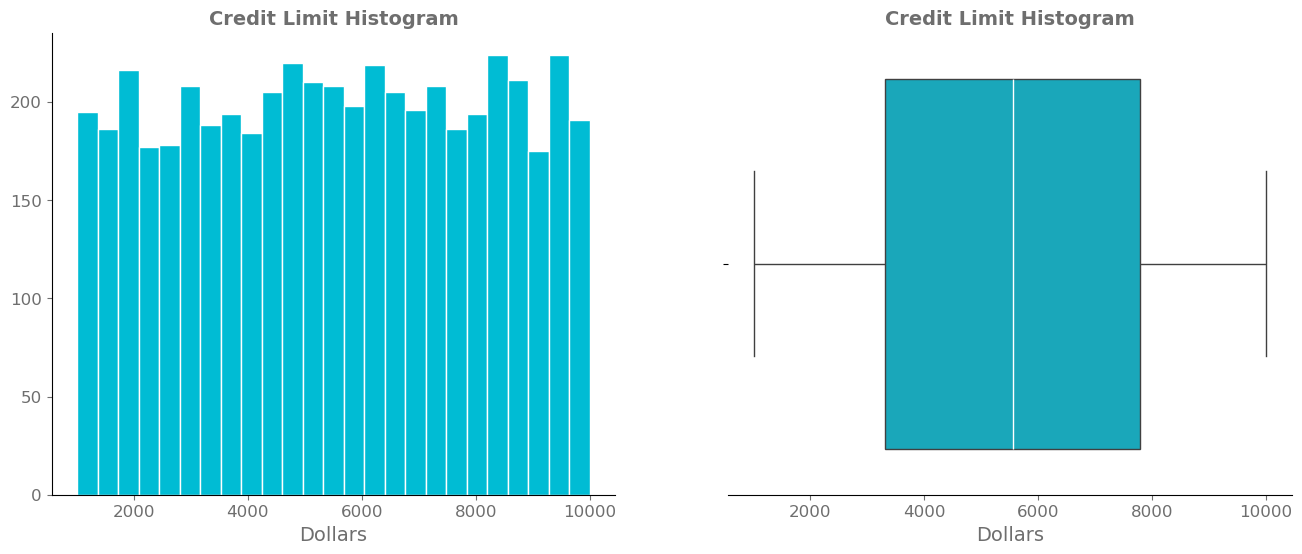

In [551]:
plot_hist_box(users, 'credit_limit', title = 'Credit Limit Histogram', xlabel = 'Dollars')
#plt.savefig('../images/hist_&_boxplot_acc_bal.png')

Same situation, not outliers and uniform distribution.

**Column**: `credit_bal`

In [580]:
users['credit_bal'].describe().round().reset_index().T

,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
credit_bal,5000.0,2487.0,1447.0,1.0,1244.0,2462.0,3723.0,4997.0


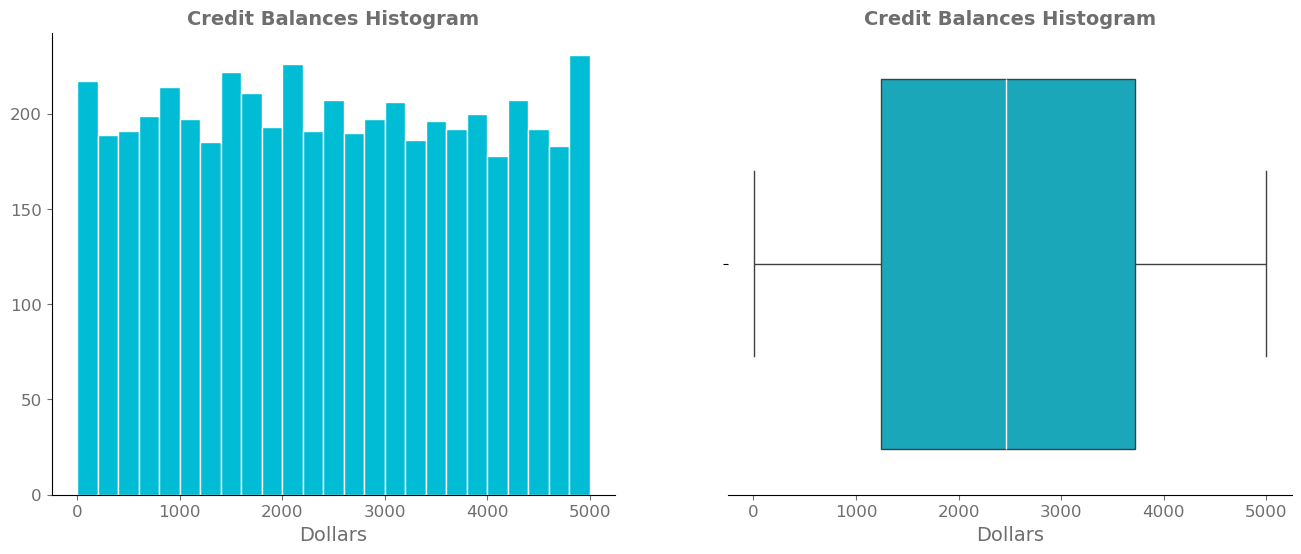

In [584]:
plot_hist_box(users, 'credit_bal', title = 'Credit Balances Histogram', xlabel = 'Dollars')

Same pattern again.  No outliers and uniformely distribuited.